# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
import numpy as np
from scipy import stats

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  
  post_prob = (true_positive_rate*prob_drunk_prior)/((true_positive_rate*prob_drunk_prior)+(false_positive_rate*(1-prob_drunk_prior)))
  result = (true_positive_rate*post_prob)/((true_positive_rate*post_prob)+(false_positive_rate*(1-post_prob)))

  return result

In [0]:
prob_drunk_given_positive(0.001,0.08, 1)

0.13525210993291495

In [0]:
from scipy import stats
data = [6, 9, 12, 7, 8, 8, 13]
mean, var, std = stats.bayes_mvs(data)

In [2]:
mean

Mean(statistic=9.0, minmax=(7.103650222612533, 10.896349777387467))

In [3]:
var

Variance(statistic=10.0, minmax=(3.1767242068607078, 24.45910382133402))

In [4]:
std

Std_dev(statistic=2.9724954732045084, minmax=(1.7823367265645143, 4.945614605014631))

In [0]:
n_samples = 100000
data = stats.norm.rvs(size=n_samples)
res_mean, res_var, res_std = stats.bayes_mvs(data, alpha=0.95)

In [6]:
res_mean

Mean(statistic=-0.0005967529099824118, minmax=(-0.006778802017127657, 0.005585296197162833))

In [8]:
res_var

Variance(statistic=0.9948754613032568, minmax=(0.9861551536342684, 1.003595768972245))

In [9]:
res_std

Std_dev(statistic=0.9974344396015493, minmax=(0.9930630707562587, 1.00180580844684))

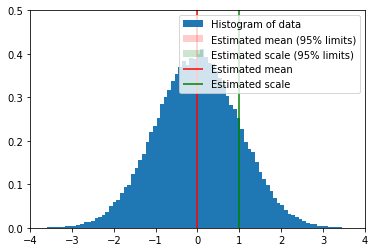

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(data, bins=100, density=True, label='Histogram of data')
ax.vlines(res_mean.statistic, 0, 0.5, colors='r', label='Estimated mean')
ax.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='r',
            alpha=0.2, label=r'Estimated mean (95% limits)')
ax.vlines(res_std.statistic, 0, 0.5, colors='g', label='Estimated scale')
ax.axvspan(res_std.minmax[0],res_std.minmax[1], facecolor='g', alpha=0.2,
            label=r'Estimated scale (95% limits)')
ax.legend(fontsize=10)
ax.set_xlim([-4, 4])
ax.set_ylim([0, 0.5])
plt.show()

In [0]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=' ?')

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
contingency_table = pd.crosstab(df['age'], df['hours-per-week'])

In [0]:
data = contingency_table
mean, var, std = stats.bayes_mvs(data)

In [31]:
mean

Mean(statistic=4.745118041387351, minmax=(4.172641736939072, 5.31759434583563))

In [32]:
var

Variance(statistic=831.2109022813155, minmax=(807.8694363103664, 854.5523682522646))

In [33]:
std

Std_dev(statistic=28.83072843827078, minmax=(28.425926561326786, 29.23553031521477))

In [0]:
## Difference between Bayesian and Frequentist Statistics

# Bayesians allow for observed frequencies ("objective information") to be updated or modified with a priori ("subjective") information, making for stronger a posteriori information.
# Frequentists don't, arguing that sufficiently strong priors can overwhelm and invalidate otherwise valid data; and strong priors are often wrong, shaped by ideology.
# Bayesians respond that observed data often suffer from random and systematic errors; that subjective data may be both more valid and more reliable;
# and that frequentists have been known to allow ideology to shape their choices of data sets to analyze and how to analyze them.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!